# <center>Кластеризация

>**Кластеризация** — это задача группировки объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров, по какому-либо критерию.

# <center>K-means

**Идея** алгоритма k-means состоит в том, что он итеративно разбивает множество объектов на заранее заданное пользователем число кластеров и стремится минимизировать расстояние от объектов внутри кластера до центроида кластера.

В результате мы получаем сгруппированные по кластерам **точки** и **центроид** (его ещё иногда называют **центром тяжести**) для каждого кластера. Визуально это может выглядеть, например, так (на графике показано разделение на четыре кластера):

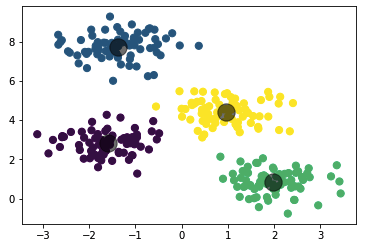

K-means является самым популярным алгоритмом. Он широко применяется для:
* сегментации изображений;
* сегментации хромосом;
* выявления ботов и аномалий;
* группировки новостных комментариев.

1. Предположим, у нас есть некоторое количество точек, расположенных на двухмерной плоскости:

    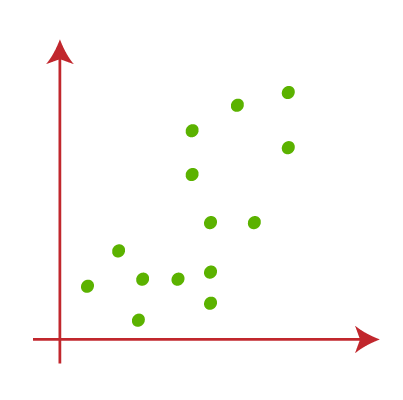
2. Будем считать, что у нас два кластера. Выберем случайные точки, которые будут центроидами кластеров (это могут быть точки, принадлежащие нашим данным, или какие-то другие):

    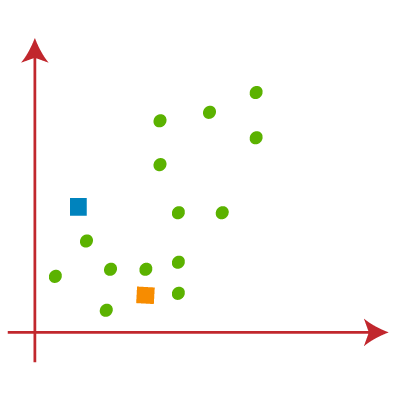
3. Теперь для каждой точки рассчитаем расстояния до обоих центроидов и отнесём её к кластеру, центроид которого находится ближе к ней:

    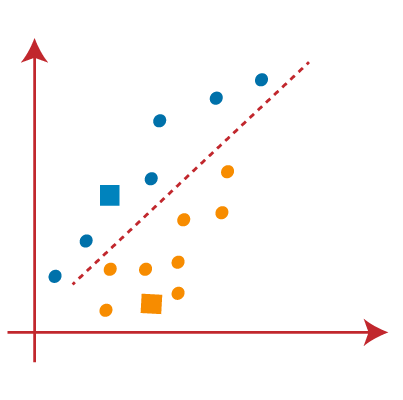
4. Для каждого кластера найдём новый центроид — такую точку, сумма квадратов расстояний до которой будет минимальной:

    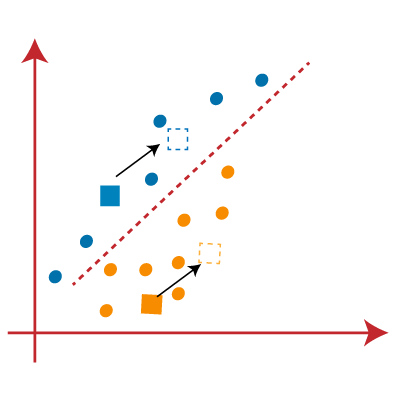
5. Далее снова рассчитаем для каждой точки расстояния до обоих центроидов и отнесём её к тому кластеру, центроид которого находится ближе к ней (в результате некоторые точки «переходят» от одного кластера к другому):

    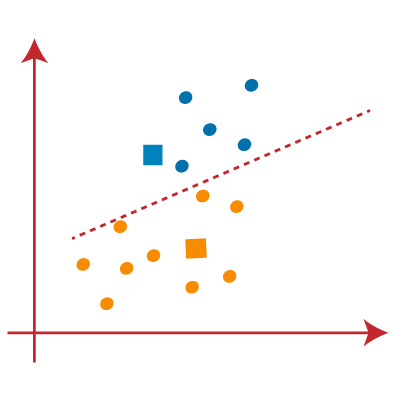
6. Мы получили новые кластеры. Теперь найдём новые центроиды для этих кластеров:

    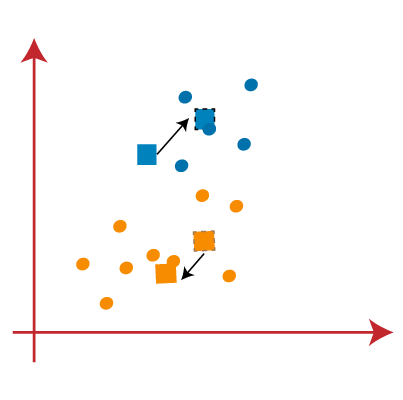
7. Повторяя данные шаги до сходимости, получаем кластеры с объектами:

    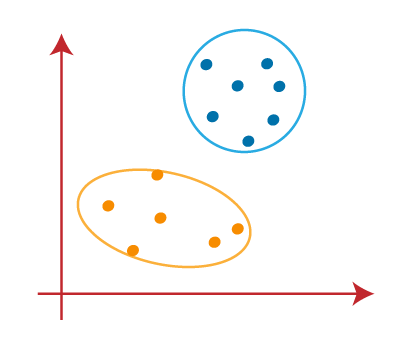

* Пусть $X$ — это пространство объектов.
* $X^N = \{ x_1, \dots, x_N \}$ — обучающая выборка.
* $ \rho : X \times X \to [0, \infty] $ — функция расстояния между объектами.

Необходимо найти:
* $Y$ — множество кластеров.
* $a: X \to Y$ — алгоритм кластеризации, такой, что выполняются следующие условия:
    * каждый кластер состоит из близких (схожих между собой) объектов;
    * объекты разных кластеров существенно различаются.

Важно сразу обозначить, что решение задачи кластеризации очень неоднозначно, так как:

* много критериев для оценки качества;
* много эвристических (не обусловленных математической теорией) методов кластеризации;
* обычно число кластеров неизвестно заранее (мы сами определяем его);
* результат кластеризации сильно зависит от параметров, которые также являются эвристиками.

Несмотря на это, кластеризация всё равно популярна и часто используется при решении прикладных задач, так как позволяет упрощать обработку данных, сокращать их объём, выделять нетипичные объекты и строить иерархию для множества объектов.

**Математическая формулировка (*алгоритм Ллойда* — именно этот алгоритм используется в `sklearn`):**

Дана выборка $x_1, \dots, x_N$.

Параметр, который мы задаём для инициализации алгоритма, — число кластеров $K: K = |Y|$

В качестве результата мы хотим получить центры кластеров $\mu_k$ и метки $k \in Y$.
1. Задаём начальные приближения центров $\mu_k$ для всех $k \in Y$ (например, случайным образом).
2. Повторяем по очереди:
    * Относим каждый объект к ближайшему центру:
    $$ k_i = \argmin_{k \in Y} || x_i - \mu_k ||, \space i=1,\dots,N $$
    Ближайший центр — это центр, до которого евклидово расстояние минимально.
    * Перемещаем центр каждого кластера в центр тяжести:
    $$ \mu_k = \frac{\sum^N_{i=1}[a_i=a]x_i}{\sum^N{i=1}[a_i=a]}, \space a \in Y $$
    В числителе суммируются все точки, которые принадлежат кластеру, для которого мы ищем центроид ($[k_i=k]$ проверяет принадлежность кластеру $k$), а в знаменателе суммируется их количество. В итоге получается отношение суммы и количества — это и есть среднее арифметическое. Работа алгоритма закончится тогда, когда выполнится число заданных заранее итераций или когда кластеры и центроиды перестанут изменяться.

У алгоритма *k-means* есть ряд **недостатков**:
* число кластеров надо знать заранее;
* очень чувствителен к первичному выбору центроидов;
* не гарантирует достижения глобального минимума суммы квадратов расстояний, периодически «застревает» в локальном минимуме.

Также у k-means есть вариации, которые применяются в некоторых специфических случаях.





## Mini-Batch K-means

Данная вариация k-means используется, когда данных очень много. Из-за их объёма вычисление центров по всей выборке занимает много времени.

Для решения этой проблемы k-means на каждом шаге работает с небольшой подвыборкой данных. В общем случае упрощённый алгоритм должен сходиться к тому же результату, что и на полной выборке. Однако исследования показывают, что качество кластеров может ухудшаться по сравнению с классическим k-means. Обычно разница в кластеризации методом Mini-Batch K-means и классическим k-means заключается в пограничных точках близко расположенных кластеров:

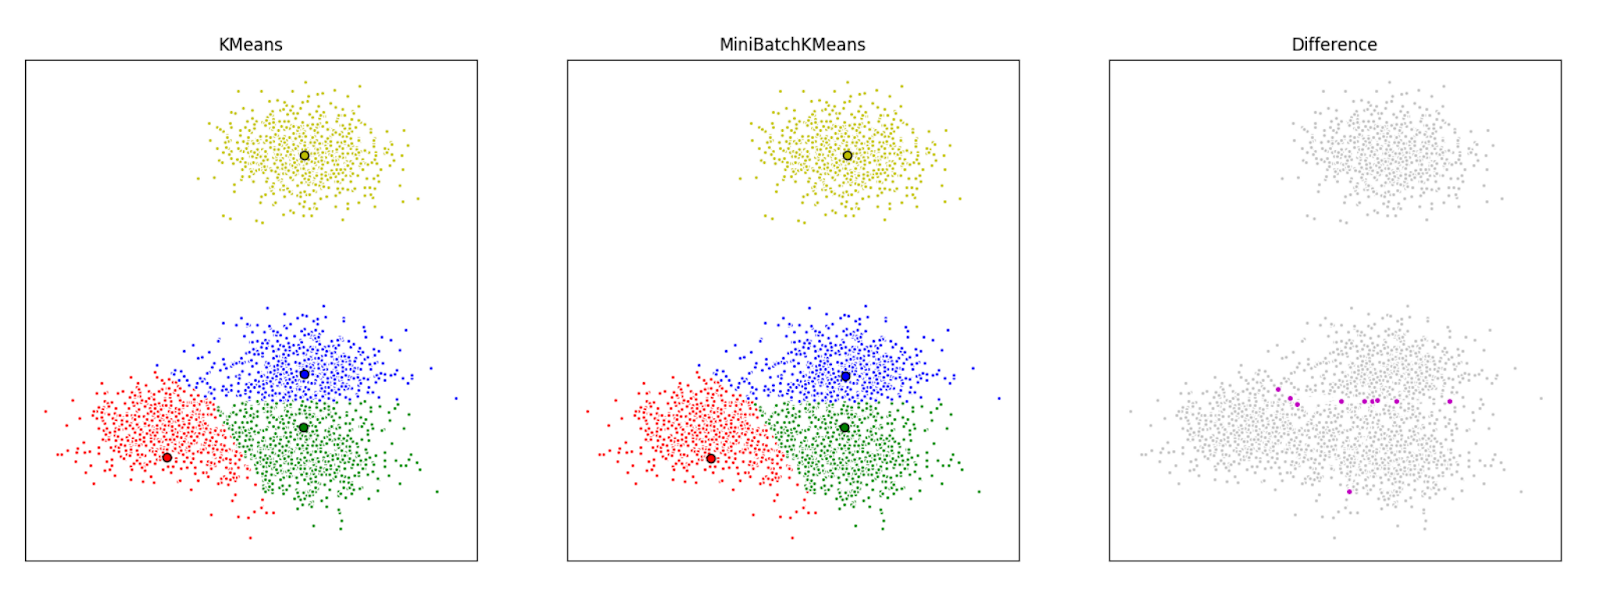

Для того чтобы запустить алгоритм кластеризации Mini-Batch K-means, нам нужна библиотека `sklearn` и модуль `MiniBatchKMeans`. Его применение и параметры аналогичны классическому *Kmeans*. Отличие лишь в том, что можно дополнительно настроить объём подвыборки:

```python
# два кластера и подвыборки объёма 6

kmeans = MiniBatchKMeans(
    n_clusters=2,
    random_state=42,
    batch_size=6
)
```
## K-means++
Данную вариацию k-means используют, если признаков очень много.

Результат и время работы алгоритма зависят от изначального выбора центроидов. Чтобы минимизировать затраты, будем действовать следующим образом:

1. Первый центроид выбираем случайным образом.
2. Для каждой точки вычисляем квадрат расстояния до ближайшего центроида из тех, что уже поставлены.
3. Далее из этих точек выбираем следующий центроид так, чтобы вероятность выбора точки была пропорциональна вычисленному для неё квадрату расстояния.
4. Когда все точки выбраны, реализуем k-means.

По умолчанию при запуске k-means в `sklearn` используется именно алгоритм k-means++. Выбор алгоритма задаётся через параметр `init`:

* `init='random'` — для классической версии k-means;
* `init='k-means++'` — для вариации k-means++.

Однако остался важный вопрос: как определить количество кластеров?

Ниже можно увидеть формулу суммы квадратов всех расстояний от точек $x_i$ до центров кластеров $C_k$, к которым принадлежат данные точки. Это значение ещё называют **инерцией**.
$$ J(C) = \sum^K_{k=1} \sum_{i \in C_k} ||x_i - \mu_k||^2 \to \min_{C} $$
При реализации алгоритма k-means для получения значения инерции используется атрибут `inertia_`.

Разумеется, чем меньше эта величина, тем лучше. Однако здесь есть большая проблема: минимальное значение этой функции будет достигаться тогда, когда количество кластеров будет равняться количеству объектов (т. е. каждый кластер будет состоять из одной точки и расстояния будут нулевыми). Это уже будет ситуация переобучения, так как алгоритм чересчур сильно подстроится под данные.

Для решения этой проблемы была выведена следующая эвристика: берётся такое число кластеров, начиная с которого значение функционала  уменьшается уже не так быстро. Формально это можно записать следующим образом:
$$ D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1})-J(C_{k})|} \to \min_k $$
Визуально это можно представить так (метод локтя):
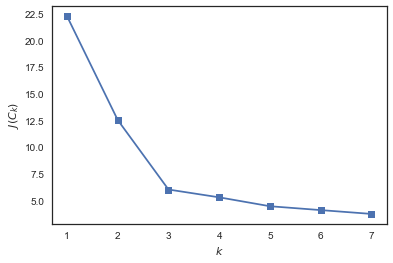
Можно увидеть, что инерция очень сильно уменьшается при увеличении числа кластеров с 1 до 2 и с 2 до 3 и уже не так значительно — при изменении $k$ с 3 до 4. То есть перегиб здесь находится в точке 3, и это значит, что три кластера — оптимальный вариант.

Если в ходе решения задачи вы встречаете график, на котором невозможно найти «локоть», на помощь придёт коэффициент силуэта.

Для того чтобы его вычислить, используется следующая формула:
$$ s_i = \frac{b_i - a_i}{\max(a_i, b_i)} $$
где:
* $a_i$ — среднее расстояние от данного объекта $x_i$ до объектов из того же кластера;
* $b_i$ — среднее расстояние от данного объекта  до объектов из другого ближайшего кластера.

Для вычисления коэффициента силуэта используется `sklearn.metrics.silhouette_score`.

Коэффициент силуэта обладает следующими **свойствами**:
* Значение коэффициента находится в диапазоне от $-1$ до $+1$, где высокое значение указывает, что объект хорошо согласуется с кластером, которому он принадлежит, и плохо согласуется с «чужими» кластерами.
* Если у подавляющего большинства объектов этот коэффициент высокий, то можно считать кластеризацию достаточно качественной.
* Если же у большого числа объектов низкий или отрицательный коэффициент силуэта, то, возможно, кластеров слишком много/мало или данные просто плохо поддаются разделению на кластеры.

Для получения итогового значения рассчитывается среднее значение силуэта для всего датасета.

Соответственно, для определения оптимального количества кластеров мы будем искать самую высокую точку на графике коэффициента силуэта (ведь чем больше коэффициент, тем лучше). Например, здесь наиболее подходящее количество кластеров — 3:

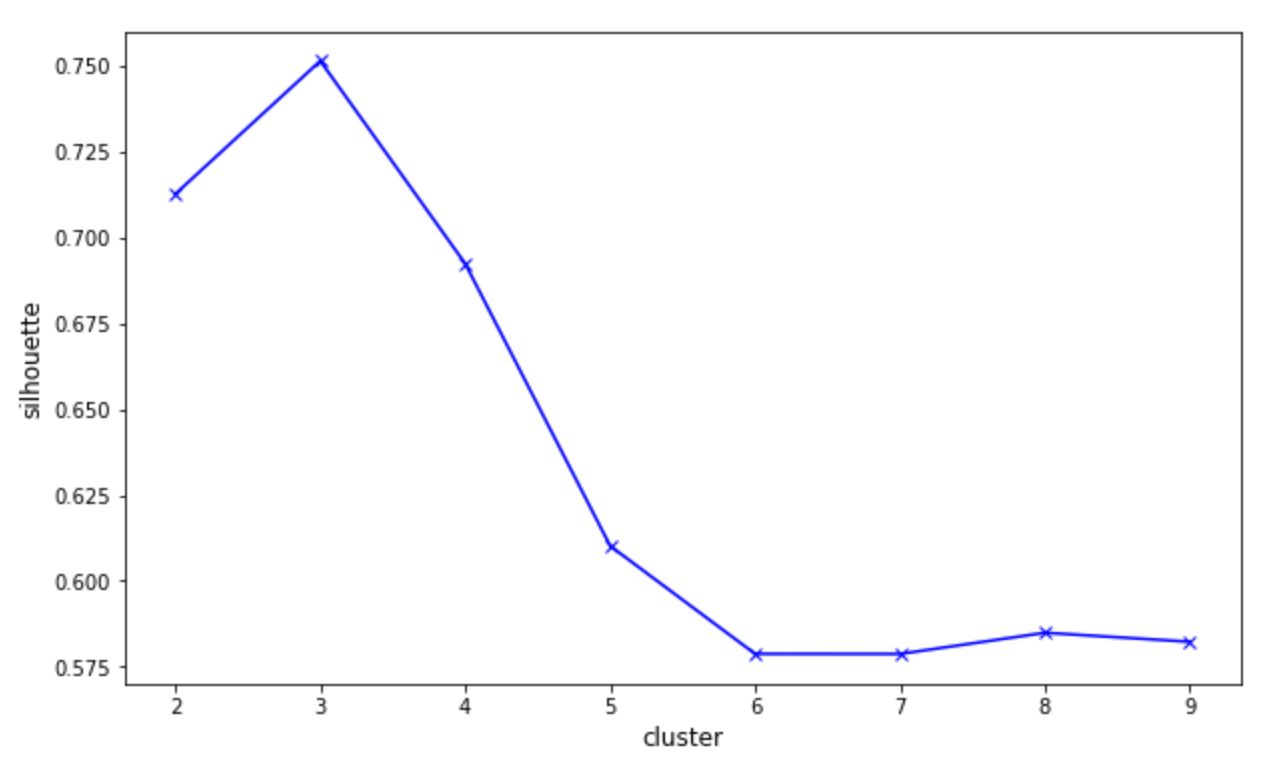

# <center>EM-алгоритм
Когда данные распределены в форме вытянутых эллипсов, k-means не справляется с кластеризацией:

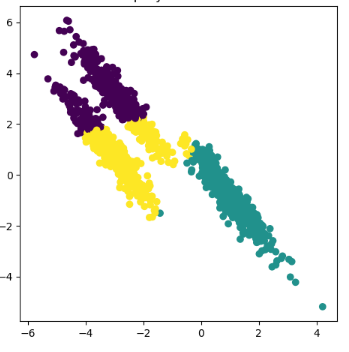

В таком случае в качестве альтернативы можно взять один из алгоритмов кластеризации **EM (Expectation-maximization)** — **модель гауссовой смеси (Gaussian Mixture Model, GMM)**, в которой данные описываются законом нормального распределения.

Эту модель часто используют, к примеру, при детекции кибератак или выявлении нетипичных физиологических паттернов.

Рассмотрим принцип реализации данного алгоритма на примере кластеризации нескольких точек, находящихся в одномерном пространстве:

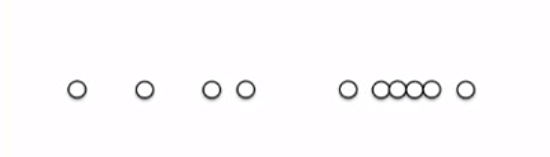

Возьмём два случайно сгенерированных распределения Гаусса (изображены на рисунке ниже <font color=blue>синим</font> и <font color=yellow>жёлтым</font> цветом).

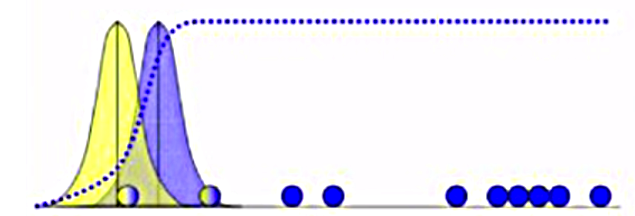

Попытаемся выяснить, с какой вероятностью каждая точка принадлежит к синему или жёлтому распределению. Синей пунктирной линией отображено апостериорное распределение вероятностей принадлежности точек к синему распределению (оно имеет форму сигмоиды и принимает значения от 0 до 1).

Например, рассмотрим точку, закрашенную <font color=red>красным</font> цветом. Скорее всего, с наибольшей вероятностью её можно будет отнести к синему распределению (просто потому, что синее распределение располагается ближе к этой точке).

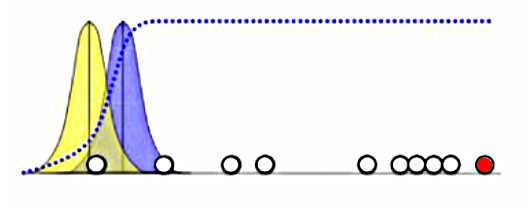

Однако у точки, выделенной красным на следующем рисунке, явно гораздо больше шансов попасть в жёлтое распределение, чем в синее, так как она находится ближе к математическому ожиданию жёлтого распределения.

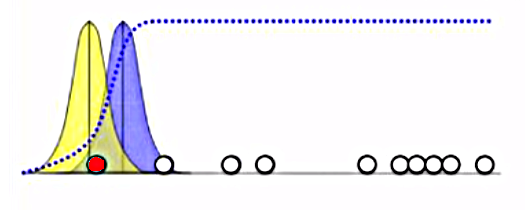

Аналогично оценим вероятность попадания каждой точки в распределения синего и жёлтого цветов и раскрасим точки соответствующе:

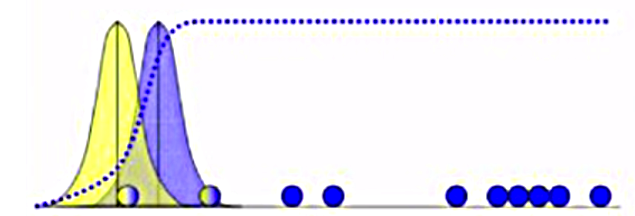

Здесь можно заметить аналогию с k-means, только в k-means мы однозначно относили каждую точку к тому или иному кластеру, а здесь для каждой точки вычисляем вероятности принадлежности к определённым кластерам. Собственно, k-means можно считать упрощённой версией EM-алгоритма.

Итак, каждая точка с какими-то вероятностями принадлежит к жёлтому и синему распределению. Теперь мы сможем использовать значения этих точек для расчёта новых математических ожиданий и дисперсий и построения новых распределений. То есть, по сути, дальше мы изменим распределения так, чтобы они максимально соответствовали точкам, которые мы к ним отнесли.

Можно отметить, что жёлтые точки не будут сильно сдвигать своё распределение, а вот синие будут «перетягивать» вправо:

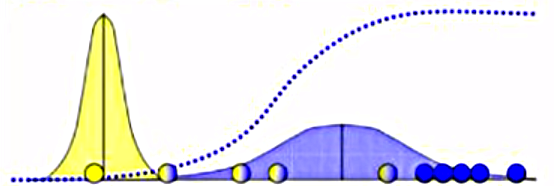

Далее мы ещё раз повторяем описанную ранее процедуру и снова обновляем распределения. После ряда итераций окончательные распределения будут выглядеть так:

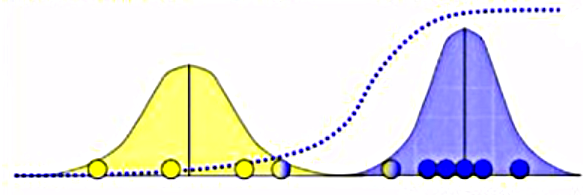

Таким образом, мы смогли кластеризовать наши точки: первые четыре относятся к жёлтому кластеру, а остальные — к синему. Так и работает EM-алгоритм кластеризации.

В более общем виде последовательность действий в EM-алгоритме можно сформулировать следующим образом:
1. Выбрать количество кластеров, которое кажется нам оптимальным для наших данных.
2. Случайным образом выбрать параметры распределений в пространстве данных.
3. Для каждой точки набора данных рассчитать вероятность принадлежности к каждому кластеру.
4. Обновить параметры распределений таким образом, чтобы максимизировать вероятность принадлежности точек, отнесённых к кластеру.
5. Повторять шаги 3-4 фиксированное число раз либо до тех пор, пока центроиды не сойдутся.

**Инициализируем алгоритм:**

**Шаг 1.** 
* $k$ кластеров

**Шаг 2.**
* Априорные вероятности кластеров: $w_1, \dots, w_k$.
* Плотности распределения кластеров: $p_1(x), \dots, p_k(x)$.

**Необходимо определить:**

Плотность распределения признаков объекта:
$$ x: p(x) = \sum^k_{j=1}w_jp_j(x) $$
**Результат:**

Получим вероятность принадлежности объекта к кластеру:
$$ p(x) = \sum^k_{j=1}w_jp_j(x) $$
где
* $w_j$ — априорная вероятность кластера $\sum^k_{j=1}w_j=1$;
* $p_j(x)=\phi(x; \theta_j)$ — функция правдоподобия для $j$-го кластера, которая содержит некоторые параметры, определяющие вероятность.

**Шаг 3.**
	
**E-шаг (expectation)** — вычисляем ожидаемый кластер для каждого объекта. На этом этапе мы определяем, к какому распределению какая точка относится:

$ g_{ij} = p(j|x_i) = \frac{w_jp_j{x_i}}{p(x_i)} $ — вероятность того, что $x_i$ принадлежит $j$-му распределению.

**Шаг 4.**

**M-шаг (maximization)** — оцениваем вес (априорную вероятность) и параметры распределения для каждого кластера. На этом этапе мы оцениваем новые параметры распределений по распределённым точкам:
$$ w_j = \frac{1}{N}\sum^N_{i=1}g_{ij} $$
$$ \theta_j = \argmax_{\theta} \sum^N_{i=1} g_{ij} \ln \phi (\theta; x) $$

Данный алгоритм использует метод максимального правдоподобия. Суть метода максимального правдоподобия заключается в том, что мы подбираем неизвестные параметры так, чтобы вероятность того, что уже произошло, оказалась максимальной, то есть чтобы точки, которые попали в распределение, были в нём с наибольшей вероятностью.

Визуализацию работы EM-алгоритма можно увидеть ниже:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/efe6e83a2d2e3f317ddd86b785905c96/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/MATHML_md10_3_9.gif)

Слева мы видим изменения распределений, а справа — изменение значения логарифмической функции правдоподобия.

Алгоритм EM очень похож на k-means. Однако у этих алгоритмов есть различия:
* кластеры в EM **эллиптические**, а в k-means — **сферические**;
* в EM кластеризация **мягкая** (вероятность принадлежности объекта к кластеру), а в k-means — **жёсткая** (определяем конкретный кластер для объекта)

Для реализации алгоритма в `sklearn` мы используем `GaussianMixture`. Для запуска алгоритма `GaussianMixture` необходимо задать следующие основные параметры:

* `n_components` — количество кластеров;
* `random_state` — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

|Преимущества EM|Недостатки EM|
|-|-|
|Устойчив к шумам и пропущенным значениям в данных.|При неудачной инициализации сходимость может оказаться медленной.|
|Кластеры, которые находит этот алгоритм, могут принимать форму эллипса, а не ограничиваться окружностями. K-Means является частным случаем GMM.|Нужно задавать количество кластеров.|
|Если объект находится в середине двух перекрывающихся кластеров, то, в отличие от k-means, не нужно решать, к какому кластеру он принадлежит — объект может принадлежать к двум разным кластерам с разной вероятностью.|Иногда останавливается в локальном минимуме и не достигает глобального.|
